<a href="https://colab.research.google.com/github/ben-fajack/Final-Sales-Predictions/blob/main/Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income Predictions and Analysis**

**Author: Ben Fajack**

In [1]:
# import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns',100)
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
fpath = "/content/drive/MyDrive/Advanced ML/Income Data/adult.csv"
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
# dropping 'eduaction' as it is redundant with the presence of 'educational-num'
df = df.drop('education', axis=1)

In [5]:
df.shape

(48842, 14)

In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [8]:
df.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00


In [9]:
# duplicates
duplicated_rows = df.duplicated()
duplicated_rows

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [10]:
# count the duplicates
df.duplicated().sum()

52

In [11]:
# visually checking the duplicate rows
df[duplicated_rows]

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [12]:
# remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
# check for how many unique values are in each column
df.nunique()

age                   74
workclass              9
fnlwgt             28523
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [14]:
# percentage of unique values in each column
df.nunique() / len(df) * 100

age                 0.151670
workclass           0.018446
fnlwgt             58.460750
educational-num     0.032794
marital-status      0.014347
occupation          0.030744
relationship        0.012298
race                0.010248
gender              0.004099
capital-gain        0.252101
capital-loss        0.202910
hours-per-week      0.196762
native-country      0.086083
income              0.004099
dtype: float64

In [15]:
# standardize the values in the income
df['income'] = df['income'].replace({'<=50K':'0', '>50K':'1'})
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

In [16]:
df['income'] = df['income'].astype(int)

In [17]:
df.value_counts('hours-per-week')

hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
87        1
82        1
94        1
79        1
69        1
Length: 96, dtype: int64

In [18]:
df.value_counts('marital-status')

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
dtype: int64

In [19]:
df.value_counts('native-country')

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [20]:
# standardize the values in the native-country
df['native-country'] = df['native-country'].replace({'South':'Unknown', '?':'Unknown'})
df['native-country'].value_counts()

United-States                 43792
Unknown                         971
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [21]:
df.value_counts('gender')

gender
Male      32614
Female    16176
dtype: int64

In [22]:
df.value_counts('occupation')

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
dtype: int64

In [23]:
# standardize the values in the native-country
df['occupation'] = df['occupation'].replace({'?':'Unknown',})
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unknown              2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [24]:
df.value_counts('relationship')

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
dtype: int64

In [25]:
df.value_counts('fnlwgt')

fnlwgt
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163443      1
163393      1
163385      1
163380      1
1490400     1
Length: 28523, dtype: int64

In [26]:
df.value_counts('workclass')

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64

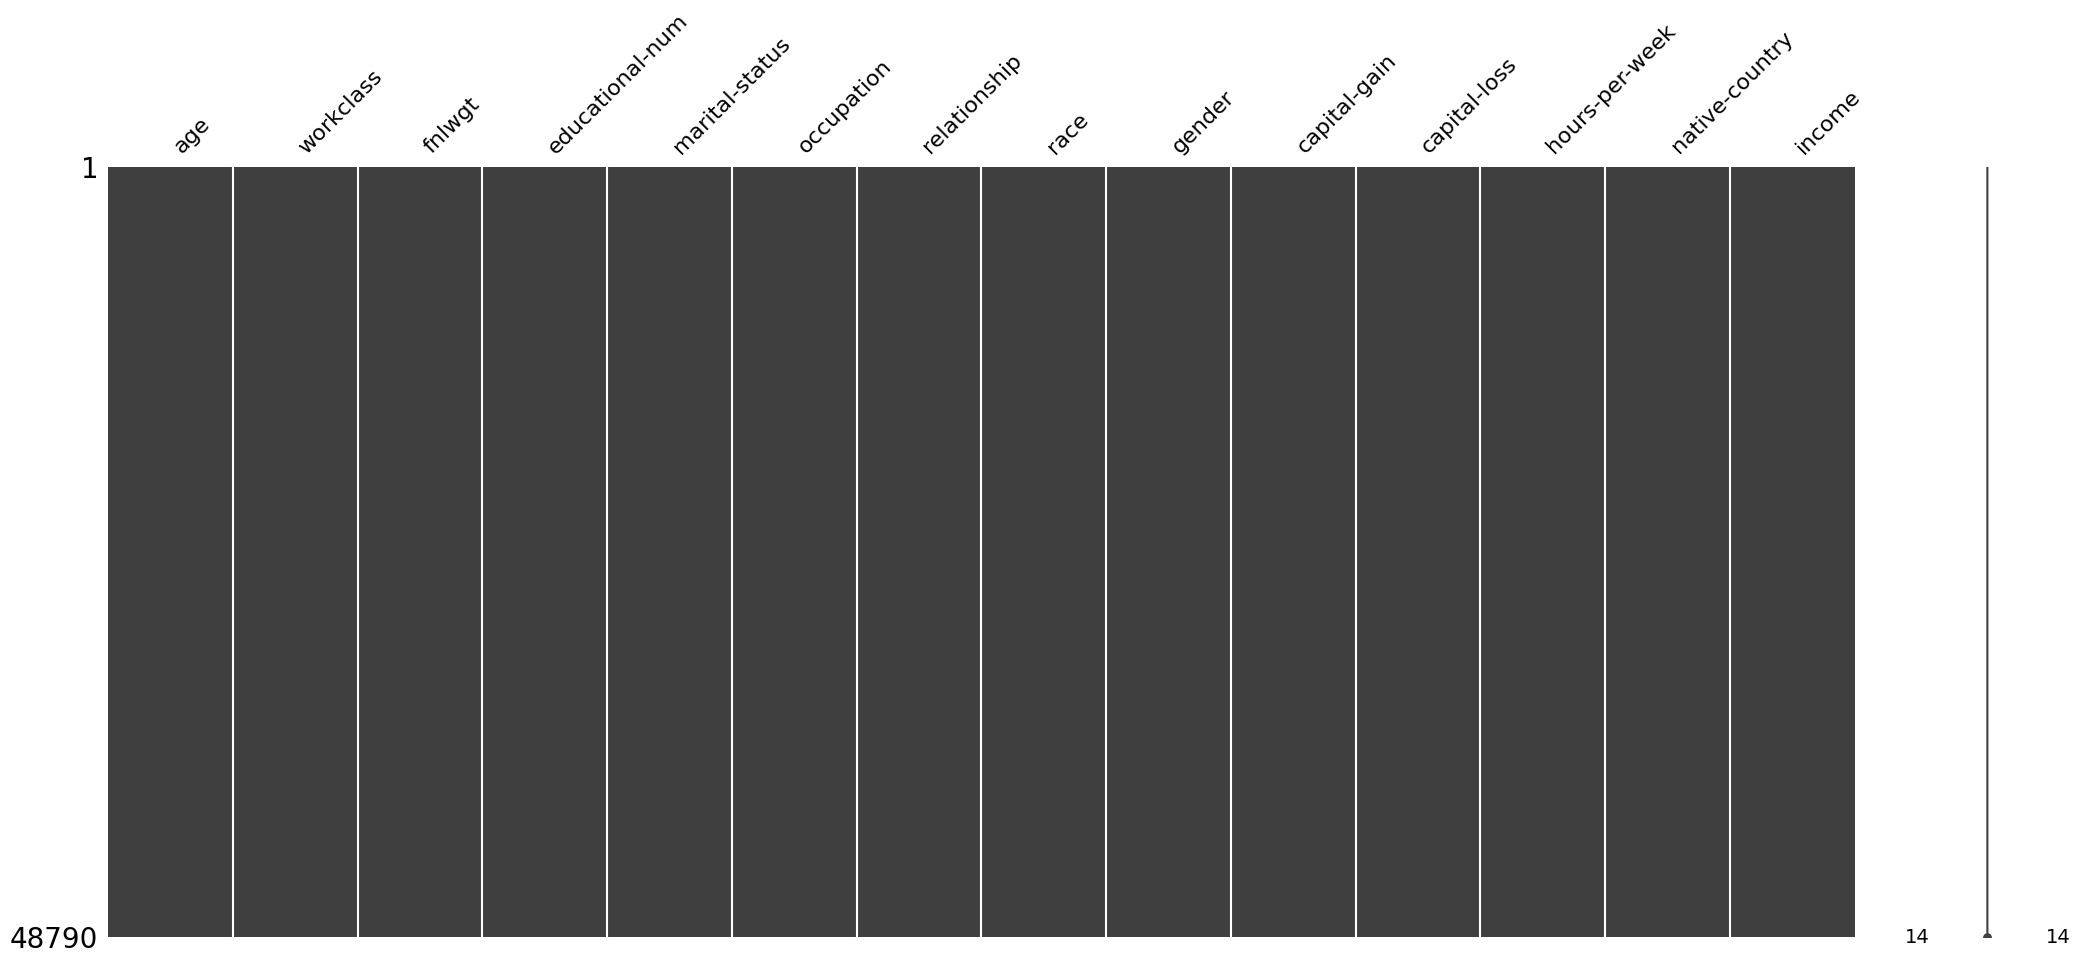

In [27]:
# checking visually
msno.matrix(df);

In [28]:
# looking for initital correlations
corr = df.corr(numeric_only=True)

[Text(0.5, 1.0, 'Correlation Heatmap')]

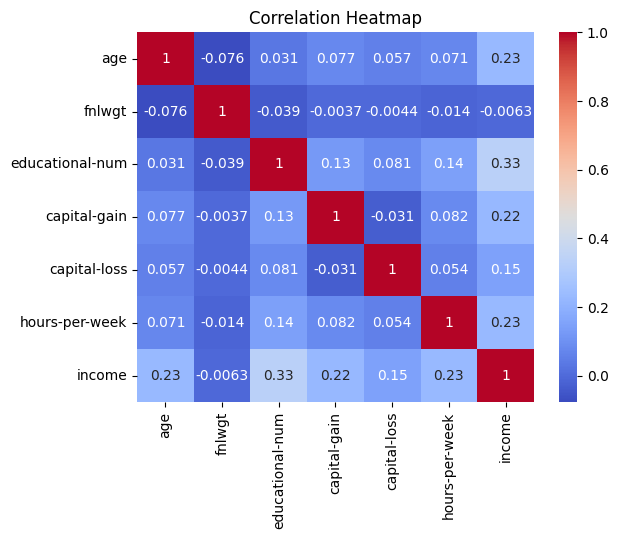

In [29]:
# heatmap for correlation vis
ax = sns.heatmap(corr,annot=True, cmap='coolwarm');
ax.set(title='Correlation Heatmap')

**No particularly strong correlations upon initial inspection with the closest exception being education. Capital gains and hours worked also show some level of correlation**

In [30]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,0


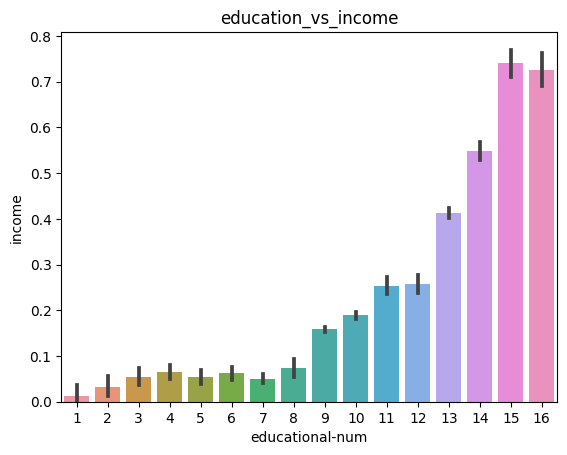

In [31]:
ax = sns.barplot(data=df,x='educational-num', y='income',)
ax.set_title("education_vs_income");

Here we can see that there is, in fact, a direct correlation between educational achievement and income. Income is a binary in this dataset where less than 50k is represented as '0' and above is represented as '1'. These plots show the average of each educational attainment segmentation in relation to those assigned designations.

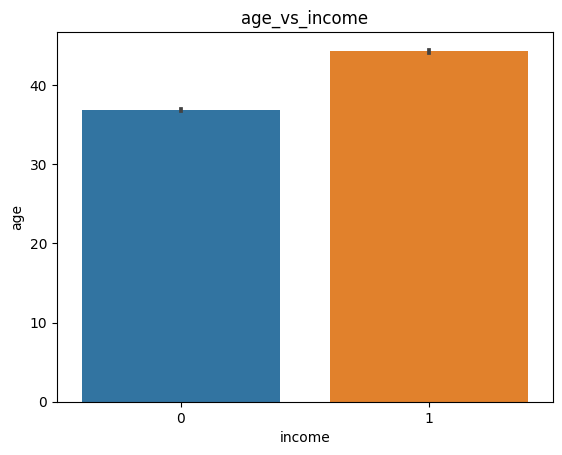

In [32]:
ax = sns.barplot(data=df,x='income', y='age',)
ax.set_title("age_vs_income");

**Here, sub-50k respondants are represented by '0' and those making more than 50k are represented by '1'. This graph clearly illustrates that there is a correlation between average income and average age.**

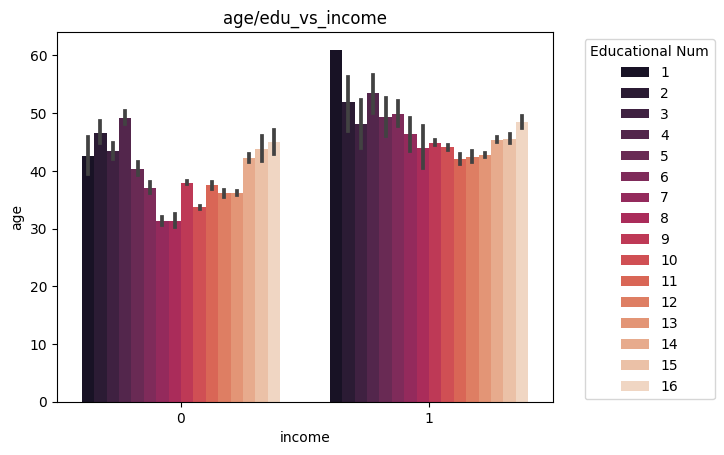

In [33]:
ax = sns.barplot(data=df,x='income', y='age', hue = 'educational-num', palette='rocket')
# Move the legend to the right side
ax.legend(title='Educational Num', bbox_to_anchor=(1.05, 1), loc='upper left')
# Create a custom color palette using "rocket" colormap
custom_palette = sns.color_palette("rocket", as_cmap=True)
ax.set_title("age/edu_vs_income");

**Here we see the combination of age and education levels on income levels. Individuals in the lowest levels of educational segmentation need the most time and experience to attain the higher income bracket represented by '1'.